# Análise de Dados de Seguros com Python

Este notebook apresenta uma análise exploratória e pré-processamento de um conjunto de dados de seguros. Utilizaremos bibliotecas como Pandas, NumPy, Matplotlib, Seaborn e Scikit-learn para manipular, visualizar e preparar os dados para modelagem.

## Configuração Inicial

Começamos importando as bibliotecas necessárias e ajustando as configurações de exibição do Pandas para melhor visualização dos dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import shapiro

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Carregamento dos Dados
Carregamos o conjunto de dados de seguros e exibimos as primeiras linhas para ter uma ideia inicial dos dados.

In [2]:
df_seguros = pd.read_csv("dados_ficticios.csv", low_memory=False)
df_seguros.head(10)

,Idade,Gênero,IMC,Filhos,Fumante,Região,Encargos
0,56.0,feminino,29.774374,2.0,sim,sudoeste,31109.889763
1,46.0,masculino,25.857395,1.0,não,nordeste,26650.702647
2,32.0,masculino,23.014840,0.0,não,sudoeste,21459.037990
3,60.0,masculino,21.408754,5.0,sim,sudeste,32704.380000
4,24.0,masculino,30.240917,4.0,não,sudeste,19920.460000
5,46.0,masculino,36.141241,1.0,sim,centro-oeste,37270.620000
6,54.0,masculino,28.453621,2.0,não,centro-oeste,25026.810000
7,21.0,feminino,33.280741,3.0,não,centro-oeste,20840.370000
8,44.0,masculino,25.654494,5.0,sim,sul,NaN
9,49.0,feminino,29.340263,1.0,não,centro-oeste,24470.130000


## Análise Exploratória Inicial
Realizamos uma análise exploratória inicial para entender melhor os dados, incluindo tipos de dados, estatísticas descritivas e a estrutura do DataFrame.

In [3]:
df_seguros.describe()

,Idade,IMC,Filhos,Encargos
count,49003.000000,49003.000000,49003.000000,49003.000000
mean,48.919617,30.506830,2.496459,30051.382281
std,20.441848,6.050873,1.701250,7128.166825
min,18.000000,20.000703,0.000000,13663.390000
25%,32.000000,25.254739,1.000000,24663.710000
50%,47.000000,30.507393,2.000000,30043.670000
75%,62.000000,35.719655,4.000000,35175.290000
max,98.000000,40.999939,5.000000,50084.640000


In [4]:
df_seguros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50003 entries, 0 to 50002
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Idade     49003 non-null  float64
 1   Gênero    49003 non-null  object 
 2   IMC       49003 non-null  float64
 3   Filhos    49003 non-null  float64
 4   Fumante   49003 non-null  object 
 5   Região    49003 non-null  object 
 6   Encargos  49003 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.7+ MB


In [5]:
df_seguros.shape

(50003, 7)

Podemos verificar que temos variáveis nulas no conjunto de dados.
Agora, vamos realizar uma análise mais detalhada das variáveis numéricas e categóricas, bem como da variável alvo.

<br/>

### Distribuição das Variáveis Numéricas
Visualizamos a distribuição das variáveis numéricas.

array([[<Axes: title={'center': 'Idade'}>,
        <Axes: title={'center': 'IMC'}>],
       [<Axes: title={'center': 'Filhos'}>,
        <Axes: title={'center': 'Encargos'}>]], dtype=object)

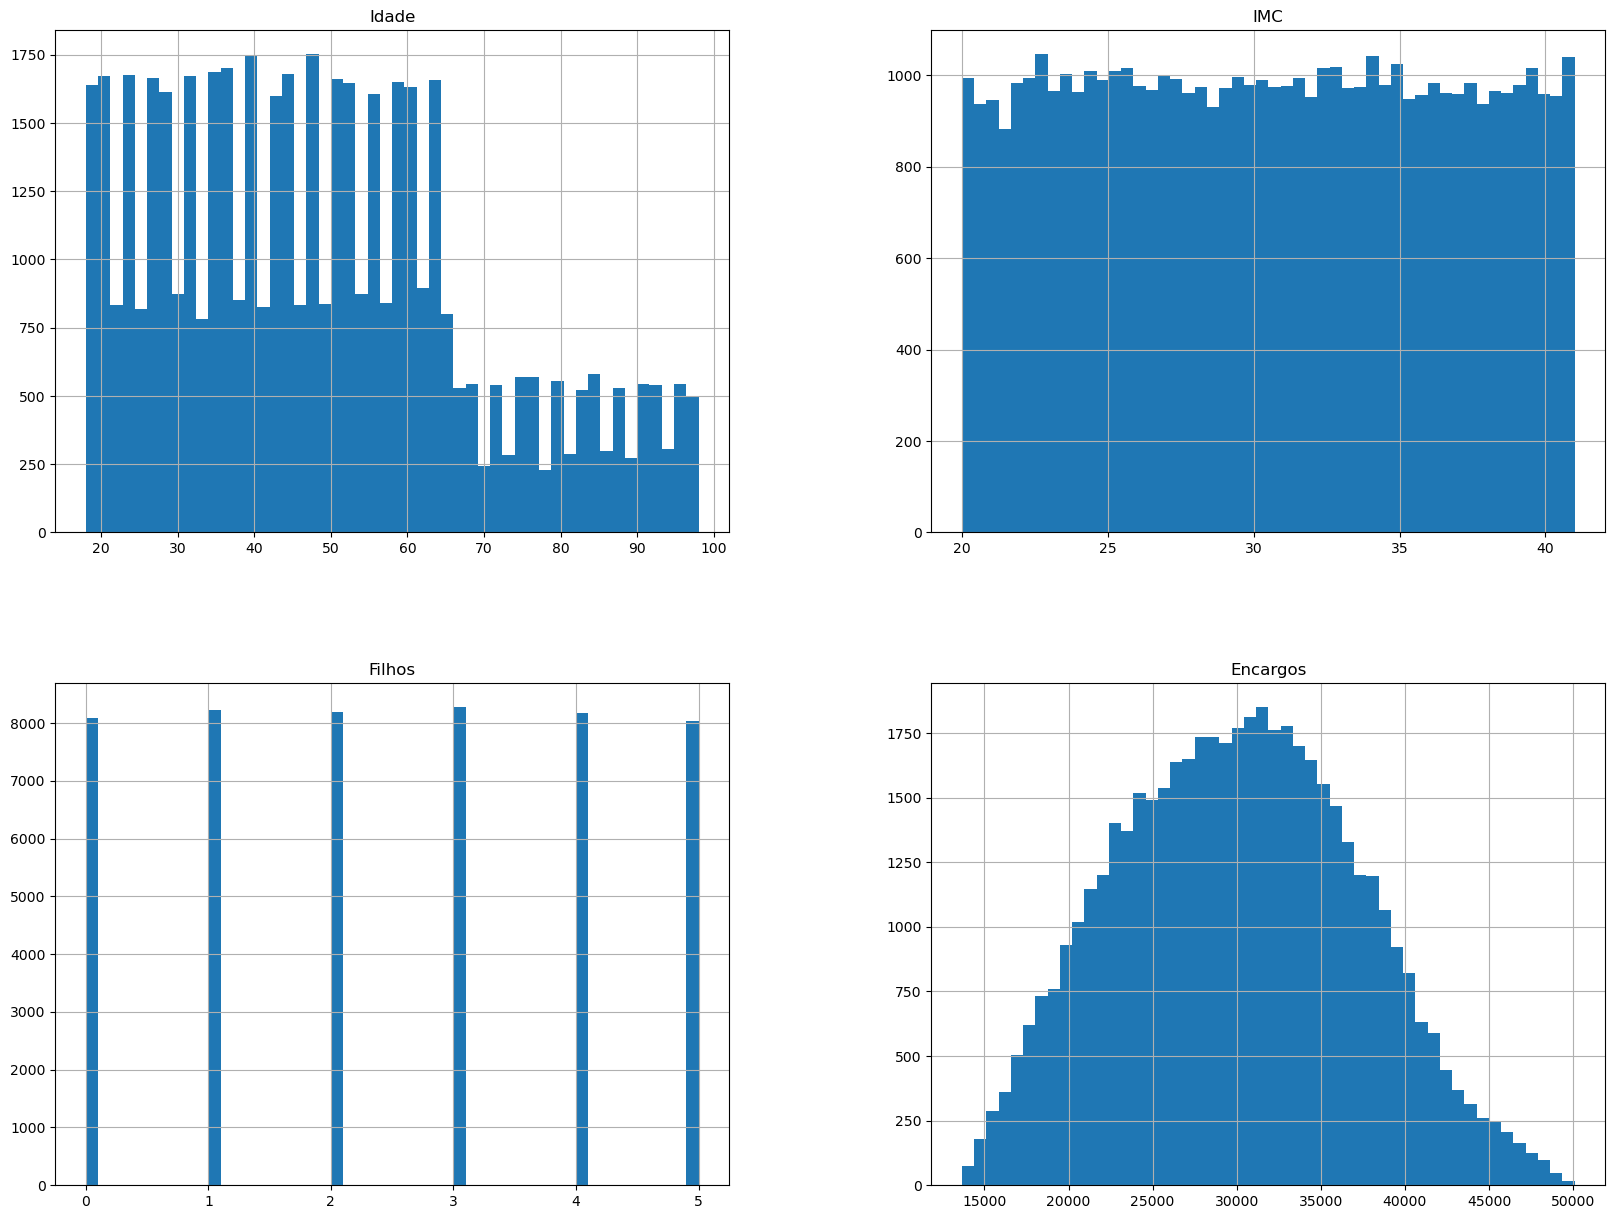

In [6]:
df_seguros.hist(bins=50, figsize=(20,15))

In [7]:
df_seguros[df_seguros['Encargos'] > 45000].shape

(900, 7)

### Distribuição das Variáveis Categóricas
Visualizamos a distribuição das variáveis categóricas.

In [8]:
df_seguros.describe(include='object')

,Gênero,Fumante,Região
count,49003,49003,49003
unique,2,2,6
top,masculino,sim,norte
freq,24538,24536,9939


### Distribuição da Variável Alvo
Visualizamos a distribuição da variável alvo.

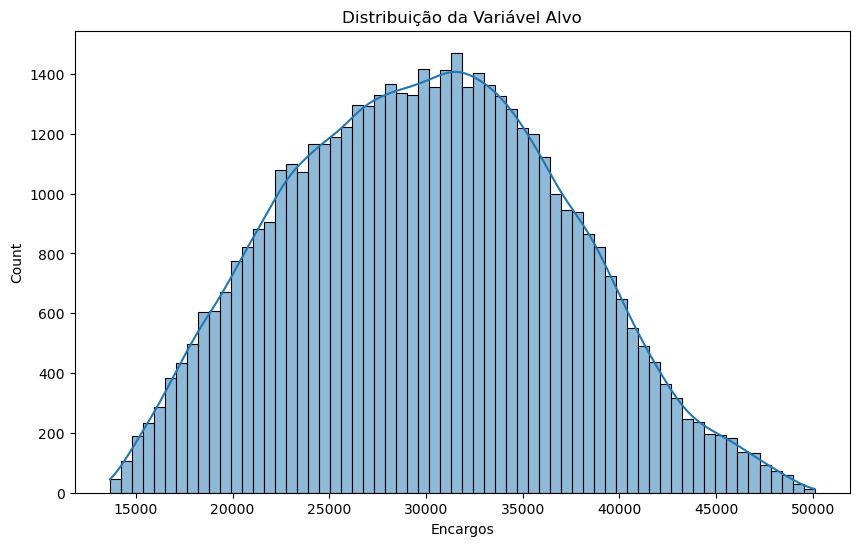

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df_seguros['Encargos'], kde=True)
plt.title('Distribuição da Variável Alvo')
plt.show()

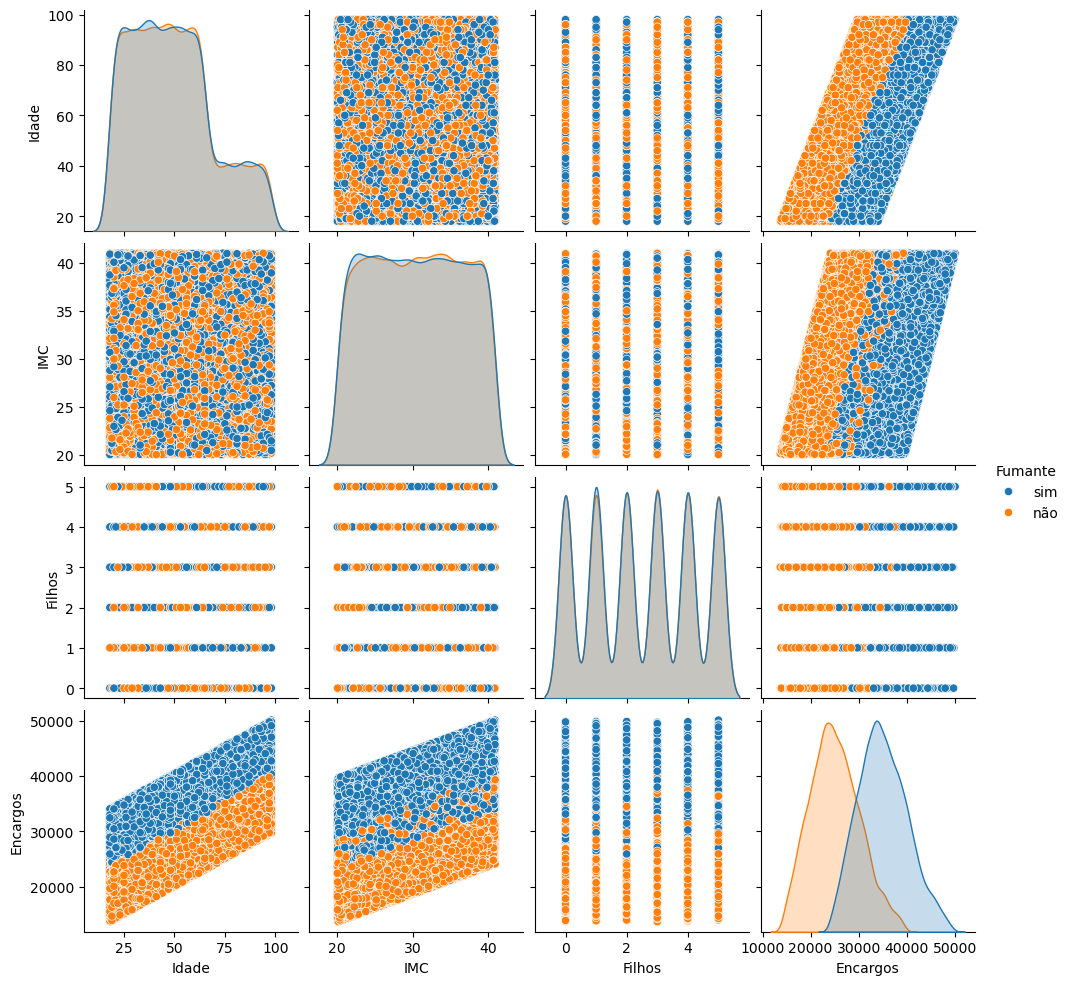

In [10]:
sns.pairplot(df_seguros, hue='Fumante')
plt.show()

## Análise dos Resultados

Podemos ver em uma análise inicial que quem é fumante tem valores mais altos de encargos

## Pré-processamento dos Dados
Antes de prosseguir com a modelagem, realizamos algumas etapas de pré-processamento nos dados, como tratamento de valores ausentes, codificação de variáveis categóricas e divisão dos dados em conjuntos de treino e teste.

<br/>

### Transformação de Variáveis Categóricas
Transformamos variáveis categóricas em numéricas usando LabelEncoder.

In [11]:
def create_cat_pipeline(df, columns):
    def apply_label_encoder(df):
        le = LabelEncoder()
        for col in df.columns:
            if df[col].dtype == 'object':
                df[col] = le.fit_transform(df[col])
        return df

    label_encoder_transformer = FunctionTransformer(apply_label_encoder)
    pipeline = make_column_transformer((label_encoder_transformer, columns))
    return pipeline

columns_to_process = df_seguros.columns
cat_pipeline = create_cat_pipeline(df_seguros, columns_to_process)
df_seguros_transformed = cat_pipeline.fit_transform(df_seguros)
df_seguros_transformed = pd.DataFrame(df_seguros_transformed, columns=df_seguros.columns)
df_seguros_transformed.head(10)

,Idade,Gênero,IMC,Filhos,Fumante,Região,Encargos
0,56.0,0.0,29.774374,2.0,1.0,4.0,31109.889763
1,46.0,1.0,25.857395,1.0,0.0,1.0,26650.702647
2,32.0,1.0,23.014840,0.0,0.0,4.0,21459.037990
3,60.0,1.0,21.408754,5.0,1.0,3.0,32704.380000
4,24.0,1.0,30.240917,4.0,0.0,3.0,19920.460000
5,46.0,1.0,36.141241,1.0,1.0,0.0,37270.620000
6,54.0,1.0,28.453621,2.0,0.0,0.0,25026.810000
7,21.0,0.0,33.280741,3.0,0.0,0.0,20840.370000
8,44.0,1.0,25.654494,5.0,1.0,5.0,NaN
9,49.0,0.0,29.340263,1.0,0.0,0.0,24470.130000


## Explicando a função create_cat_pipeline

A função create_cat_pipeline é projetada para criar uma pipeline de pré-processamento para variáveis categóricas em um DataFrame do pandas. Ela recebe dois parâmetros: df, que é o DataFrame a ser processado, e columns, que são as colunas a serem transformadas. Aqui está o que cada parte da função faz:
  
 1. Definição de apply_label_encoder: Dentro da função create_cat_pipeline, é definida uma função interna chamada apply_label_encoder. Esta função interna utiliza o LabelEncoder do scikit-learn para transformar variáveis categóricas em representações numéricas. Para cada coluna no DataFrame, se o tipo de dado for 'object' (indicando uma variável categórica), o LabelEncoder é aplicado para transformar os valores categóricos em números. A função então retorna o DataFrame modificado.  
2. Criação do label_encoder_transformer: Após definir a função apply_label_encoder, um FunctionTransformer é criado com esta função. O FunctionTransformer é uma ferramenta do scikit-learn que permite a criação de transformadores personalizados para pipelines de pré-processamento, utilizando funções arbitrárias.  
3. Criação da pipeline: Em seguida, a função make_column_transformer é usada para criar uma pipeline de transformação. O make_column_transformer recebe o label_encoder_transformer e as colunas especificadas, aplicando o transformador apenas às colunas indicadas. Isso permite que diferentes transformações sejam aplicadas a diferentes conjuntos de colunas dentro do mesmo DataFrame.  
4. Retorno da pipeline: A função create_cat_pipeline retorna a pipeline criada, que pode ser usada para transformar o DataFrame de entrada.  

Após a definição da função create_cat_pipeline, ela é utilizada para criar uma pipeline chamada cat_pipeline, passando o DataFrame df_seguros e suas colunas como argumentos. A pipeline é então aplicada ao DataFrame df_seguros usando o método fit_transform, resultando em um novo DataFrame df_seguros_transformed com as variáveis categóricas transformadas em representações numéricas. Por fim, as primeiras 10 linhas do DataFrame transformado são exibidas usando o método .head(10).

### Análise de Correlação
Analisamos a correlação entre as variáveis numéricas.

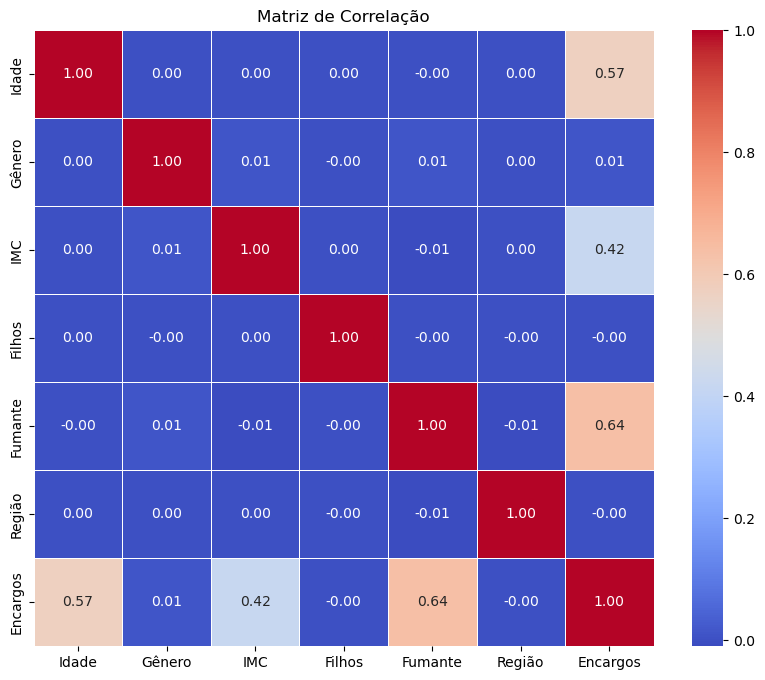

In [12]:
df_seguros_numerico = df_seguros_transformed.select_dtypes([np.number])
correlation_matrix = df_seguros_numerico.corr(numeric_only=True).round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

### Tratamento de Dados Nulos
Tratamos dados nulos preenchendo-os com a média das colunas.

In [13]:
imputer = SimpleImputer(strategy='mean')
seguros_num = pd.DataFrame(imputer.fit_transform(df_seguros_numerico), columns=df_seguros_numerico.columns)
print(seguros_num.head(10))

   Idade  Gênero        IMC  Filhos  Fumante  Região      Encargos
0   56.0     0.0  29.774374     2.0      1.0     4.0  31109.889763
1   46.0     1.0  25.857395     1.0      0.0     1.0  26650.702647
2   32.0     1.0  23.014840     0.0      0.0     4.0  21459.037990
3   60.0     1.0  21.408754     5.0      1.0     3.0  32704.380000
4   24.0     1.0  30.240917     4.0      0.0     3.0  19920.460000
5   46.0     1.0  36.141241     1.0      1.0     0.0  37270.620000
6   54.0     1.0  28.453621     2.0      0.0     0.0  25026.810000
7   21.0     0.0  33.280741     3.0      0.0     0.0  20840.370000
8   44.0     1.0  25.654494     5.0      1.0     5.0  30051.382281
9   49.0     0.0  29.340263     1.0      0.0     0.0  24470.130000


### Divisão dos Dados
Dividimos os dados em conjuntos de treino e teste.
Devemos fazer isso antes de aplicar normalização e padronização para evitar vazamento de dados, garantindo que os parâmetros sejam calculados apenas no conjunto de treino.

In [14]:
X = seguros_num.drop('Encargos', axis=1)
y = seguros_num['Encargos']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40002, 6) (10001, 6) (40002,) (10001,)


O resultado (40002, 6) (10001, 6) (40002,) (10001,) obtido ao executar o código indica o seguinte:  
- (40002, 6): O conjunto de treino X_train possui 40.002 registros e 6 características (ou colunas). Isso significa que, após a divisão, 80% dos dados foram alocados para treinamento.
- (10001, 6): O conjunto de teste X_test possui 10.001 registros e 6 características. Isso representa 20% dos dados, alocados para teste.
- (40002,): O vetor de rótulos y_train para o conjunto de treino possui 40.002 registros, correspondendo a cada uma das entradas em X_train.
- (10001,): O vetor de rótulos y_test para o conjunto de teste possui 10.001 registros, correspondendo a cada uma das entradas em X_test.

Esses resultados mostram a divisão dos dados em conjuntos de treino e teste, mantendo a proporção especificada de 80% para treino e 20% para teste, com y_train e y_test representando os valores da variável alvo (Encargos) para cada conjunto respectivamente.

### Normalização e Padronização dos Dados
Aplicamos normalização e padronização aos dados numéricos.

In [15]:
num_pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler()),
])
seguros_num_tr = num_pipeline.fit_transform(seguros_num)
print(seguros_num_tr[:10])

[[ 3.49886922e-01 -9.87149891e-01 -1.22279804e-01 -2.94785893e-01
   8.72912355e-01  9.78273170e-01  1.50005508e-01]
 [-1.44276925e-01  8.72841669e-01 -7.76199394e-01 -8.88562328e-01
  -9.87071302e-01 -7.10272090e-01 -4.81924486e-01]
 [-8.36106312e-01  8.72841669e-01 -1.25074933e+00 -1.48233876e+00
  -9.87071302e-01  9.78273170e-01 -1.21765693e+00]
 [ 5.47552461e-01  8.72841669e-01 -1.51887711e+00  1.48654341e+00
   8.72912355e-01  4.15424750e-01  3.75967365e-01]
 [-1.23143739e+00  8.72841669e-01 -4.43928378e-02  8.92766977e-01
  -9.87071302e-01  4.15424750e-01 -1.43569523e+00]
 [-1.44276925e-01  8.72841669e-01  9.40636108e-01 -8.88562328e-01
   8.72912355e-01 -1.27312051e+00  1.02306827e+00]
 [ 2.51054153e-01  8.72841669e-01 -3.42772621e-01 -2.94785893e-01
  -9.87071302e-01 -1.27312051e+00 -7.12053082e-01]
 [-1.37968654e+00 -9.87149891e-01  4.63090252e-01  2.98990542e-01
  -9.87071302e-01 -1.27312051e+00 -1.30533094e+00]
 [-2.43109695e-01  8.72841669e-01 -8.10072681e-01  1.48654341e+0

O resultado apresentado após a execução do código indica a transformação dos dados numéricos do conjunto seguros_num utilizando uma pipeline que aplica, sequencialmente, a normalização (com MinMaxScaler) e a padronização (com StandardScaler). Cada linha do resultado representa um registro do conjunto de dados original, transformado pelas operações definidas na pipeline. Aqui está o que cada parte faz:  

- Normalização (MinMaxScaler): Escala cada característica para um intervalo dado, tipicamente entre zero e um, de modo que todos os valores de uma característica específica estejam dentro desse intervalo. Isso é útil para algoritmos de aprendizado de máquina que são sensíveis à escala dos dados.  
- Padronização (StandardScaler): Ajusta as características para que tenham média zero e desvio padrão de um. Isso significa que os valores transformados terão propriedades de uma distribuição normal padrão (com média 0 e desvio padrão 1), o que é desejável em muitos modelos de aprendizado de máquina.  

Essas transformações são importantes para preparar os dados para modelagem, especialmente para algoritmos que assumem que os dados estão normalmente distribuídos ou são sensíveis à escala das características, como muitos algoritmos de aprendizado de máquina.

### Aplicando PCA
Aplicamos a Análise de Componentes Principais (PCA) aos dados numéricos para reduzir a dimensionalidade.

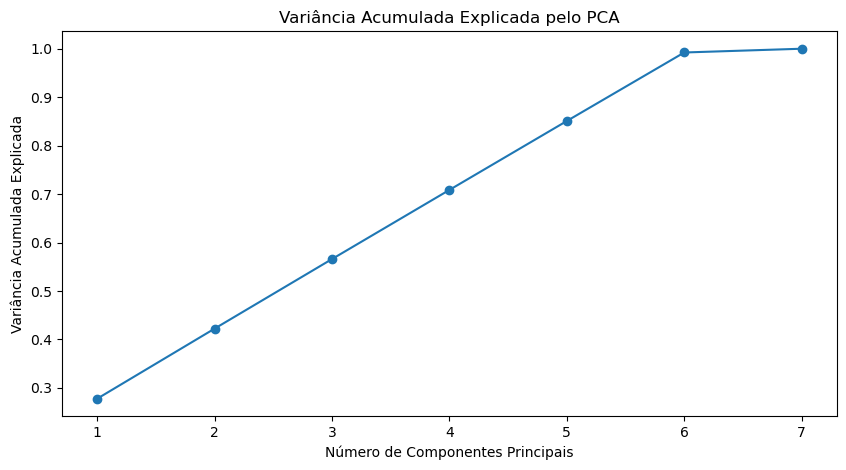

In [16]:
pca = PCA()
# Aplicando o PCA ao dataframe sem a coluna 'Encargos'
pca.fit(seguros_num_tr)
variancia_cumulativa = np.cumsum(pca.explained_variance_ratio_)

# Visualização da variância explicada acumulada
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(variancia_cumulativa) + 1), variancia_cumulativa, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Acumulada Explicada')
plt.title('Variância Acumulada Explicada pelo PCA')
plt.show()

O gráfico apresentado após a execução do código mostra a variância explicada acumulada em relação ao número de componentes principais. Cada ponto no gráfico representa a variância acumulada explicada pelos componentes principais até aquele ponto. O eixo x indica o número de componentes principais, enquanto o eixo y mostra a variância acumulada explicada.

Para obtermos uma variancia explicada de 80%, precisamos de 5 componentes principais. 

Podemos visualizar isso também da forma feita abaixo:

In [17]:
def calcular_num_componentes(variancia_desejada, dados):
    pca = PCA()
    pca.fit(dados)
    variancia_cumulativa = np.cumsum(pca.explained_variance_ratio_)
    num_de_pca = np.argmax(variancia_cumulativa >= variancia_desejada) + 1
    return num_de_pca


# Vamos definir um limiar de 80%, ou seja, queremos obter uma porcentagem de explicancia sobre
# nossos dados de igual a 80%
limiar_de_variancia = 0.80

# Calculando o número de componentes para 80% da variância
num_de_pca = calcular_num_componentes(limiar_de_variancia, seguros_num_tr)

print(f"Número de Componentes para {limiar_de_variancia * 100}% da Variância: {num_de_pca}")


Número de Componentes para 80.0% da Variância: 5


Por fim vamos aplicar o PCA com 5 componentes principais ao nosso conjunto de dados.

In [18]:
pca = PCA(n_components=num_de_pca)
X_train_scaled = num_pipeline.fit_transform(X_train)
X_test_scaled = num_pipeline.transform(X_test)

# Ajustando o PCA apenas ao conjunto de treinamento
X_train_pca = pca.fit_transform(X_train_scaled)

# Aplicando a transformação ao conjunto de teste
X_test_pca = pca.transform(X_test_scaled)

Agora vamos exibir a proporção de variância explicada e visualizar o DataFrame reduzido com o PCA.
A proporção de variância explicada é a razão entre a variância explicada de um componente e a variância total.


Proporção de Variância Explicada
[0.16886556 0.16821905 0.16732802 0.1663299  0.1653357 ]

DataFrame reduzido com PCA
        PC1       PC2       PC3       PC4       PC5
0  1.247025 -0.534115  0.624730 -0.037199 -0.173522
1 -0.287606  0.298444  1.075026 -0.224313 -0.383590
2 -0.145037  0.597425  0.854717 -0.244660 -0.792721
3  1.287077  0.026012 -0.732281  0.618927  0.911423
4 -0.568167 -0.652032  1.122153  0.012106  1.341732
5  0.145138 -1.539433 -0.516675  1.408655  0.615748
6 -0.492761 -0.835134 -1.446745 -2.041437  1.660505
7  1.531538 -1.257547 -1.716890 -0.979419  0.395139
8  0.311214 -1.584813 -0.588271  0.634490 -0.373303
9 -1.659665  0.046519  0.895204 -0.316714 -0.125605


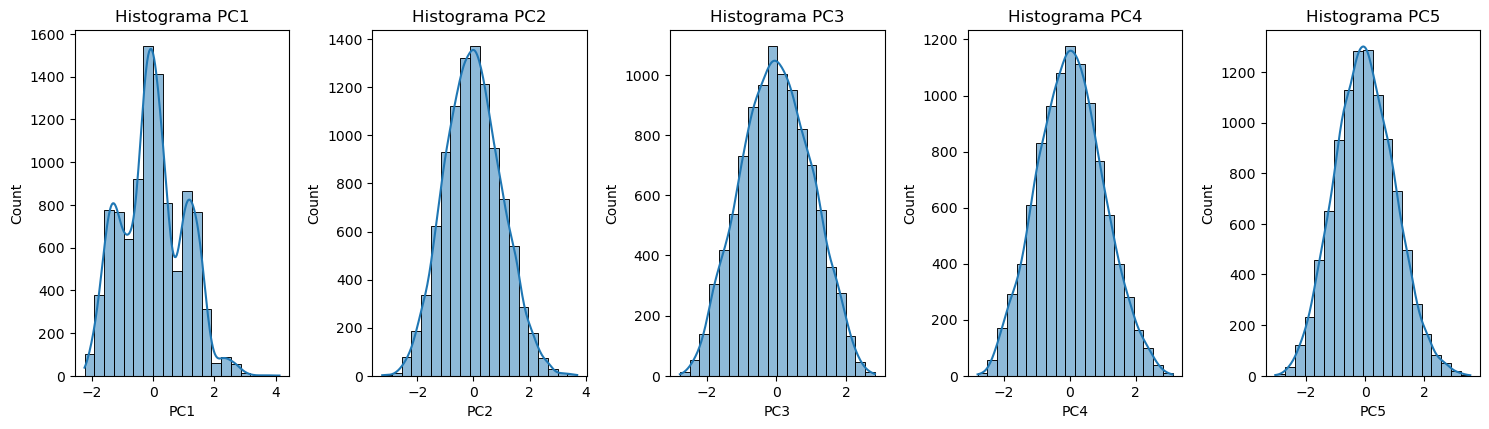

In [19]:
# Exibe a proporção de variância explicada
# A proporção de variância explicada é a razão entre a variância explicada de um componente e a variância total
explained_variance_ratio = pca.explained_variance_ratio_
print("\nProporção de Variância Explicada")
print(explained_variance_ratio)

# Pegando o número de componentes principais gerados
num_components = X_test_pca.shape[1]
# Gerando uma lista para cada PCA
column_names = [f'PC{i}' for i in range(1, num_components + 1)]
# Criando um novo dataframe para visualizarmos como ficou nossos dados reduzidos com o PCA
pca_df = pd.DataFrame(data=X_test_pca, columns=column_names)

print("\nDataFrame reduzido com PCA")
print(pca_df.head(10))

# Criar histogramas para cada coluna
plt.figure(figsize=(15, 8))
for i, col in enumerate(pca_df.columns[:10]):
    plt.subplot(2, 5, i + 1)  # Aqui, ajustei para 2 linhas e 5 colunas
    sns.histplot(pca_df[col], bins=20, kde=True)
    plt.title(f'Histograma {col}')
plt.tight_layout()
plt.show()

### Verificando a normalidade dos dados

In [20]:
# Suprimir o aviso específico gerado pela função scipy.stats.shapiro
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10001.")
    # Coloque aqui a chamada à função que gera o aviso, por exemplo:
    for column in pca_df.columns:
        stat, p_value = shapiro(pca_df[column])
        print(f'\nVariável: {column}, Estatística de teste: {stat}, Valor p: {p_value}')
    
        # Você pode então interpretar o valor p para determinar se a variável segue uma distribuição normal
        if p_value > 0.05:
            print(f'A variável {column} parece seguir uma distribuição normal.\n')
        else:
            print(f'A variável {column} não parece seguir uma distribuição normal.\n')


Variável: PC1, Estatística de teste: 0.9856156439953394, Valor p: 1.3973423993503432e-30
A variável PC1 não parece seguir uma distribuição normal.


Variável: PC2, Estatística de teste: 0.9980369616032975, Valor p: 5.197109056662878e-10
A variável PC2 não parece seguir uma distribuição normal.


Variável: PC3, Estatística de teste: 0.9952455737936513, Valor p: 1.2130603437053169e-17
A variável PC3 não parece seguir uma distribuição normal.


Variável: PC4, Estatística de teste: 0.99745552336065, Valor p: 5.313173775447323e-12
A variável PC4 não parece seguir uma distribuição normal.


Variável: PC5, Estatística de teste: 0.9981091309793846, Valor p: 9.68755616185261e-10
A variável PC5 não parece seguir uma distribuição normal.



É importante verificar se os dados seguem uma distribuição normal, pois muitos algoritmos de aprendizado de máquina assumem que os dados são normalmente distribuídos. Aqui, usamos o teste de normalidade de Shapiro-Wilk para verificar a normalidade dos dados após a aplicação do PCA.

## Modelagem e Avaliação

In [21]:
# Treinando o modelo de árvore de decisão
dt_regressor = RandomForestRegressor(n_estimators=5, random_state=42)
dt_regressor.fit(X_train_pca, y_train)


RandomForestRegressor(n_estimators=5, random_state=42)

### Avaliação do Modelo

In [22]:
# Realizando previsões no conjunto de teste
y_pred = dt_regressor.predict(X_test_pca)

y_pred[:5], y_test[:5]


(array([33754.71645614, 26834.21      , 27478.274     , 34309.136     ,
        37695.382     ]),
 25273    34444.80
 9478     26915.92
 41257    27337.53
 33494    34083.94
 13876    37730.17
 Name: Encargos, dtype: float64)

### Métricas de Avaliação

In [23]:
# Calculando métricas de avaliação
print(f'\nErro Quadrático Médio da Raiz (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'\nErro Absoluto Médio (MAE): {mean_absolute_error(y_test, y_pred)}')
print(f'\nCoeficiente de Determinação (R²): {r2_score(y_test, y_pred)}')


Erro Quadrático Médio da Raiz (RMSE): 2474.203166087138

Erro Absoluto Médio (MAE): 1333.3053678950755

Coeficiente de Determinação (R²): 0.8766755908581073


Os resultados das métricas de avaliação do modelo são interpretados da seguinte forma:  
- MSE (Erro Quadrático Médio) de 2474.20: Esta métrica mede a média dos quadrados dos erros, ou seja, a diferença quadrada entre os valores previstos pelo modelo e os valores reais. Um MSE de 2474.20 indica que, em média, o quadrado da diferença entre a previsão e o valor real é esse valor. Quanto menor o MSE, melhor o modelo em termos de precisão.  
- MAE (Erro Absoluto Médio) de 1333.30: O MAE mede a média da diferença absoluta entre os valores previstos e os valores reais, fornecendo uma ideia da magnitude do erro sem considerar sua direção (positiva ou negativa). Um MAE de 1333.30 sugere que, em média, o modelo erra por essa quantidade ao fazer previsões. Valores menores de MAE indicam um modelo mais preciso, como nossa escala vai de aproximadamente 15000 até 50000 um erro de 1333.30 é muito bom.  
- R² (Coeficiente de Determinação) de 0.87: O R² varia entre 0 e 1 e indica o quão bem as variáveis independentes explicam a variância da variável dependente. Um R² de 0.87 significa que 87% da variância na variável dependente pode ser explicada pelas variáveis independentes do modelo. Quanto mais próximo de 1, melhor o modelo é capaz de explicar a variância dos dados. Um valor de 0.79 é geralmente considerado bom, indicando que o modelo tem uma capacidade razoável de prever os valores corretos.

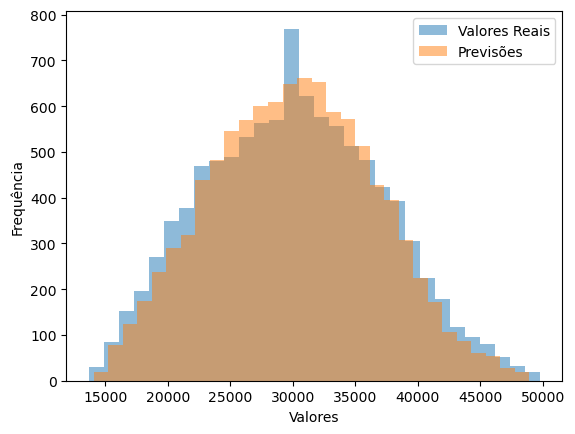

In [24]:
# Obtenha as previsões para todo o conjunto de dados

# Crie um histograma dos valores reais
plt.hist(y_test, bins=30, alpha=0.5, label='Valores Reais')

# Crie um histograma dos valores previstos
plt.hist(y_pred, bins=30, alpha=0.5, label='Previsões')

plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.legend(loc='upper right')

plt.show()

# Executando tudo sem aplicar o PCA

## Aplicando a pipeline de pré-processamento aos dados

Agora vamos criar tudo o que já fizemos em uma pipeline para facilitar o uso, sem a utilização do PCA sobre os dados

In [25]:
# Obtendo os atributos numéricos do conjunto de dados, excluindo 'Encargos'.
num_attribs = list(df_seguros.select_dtypes(include=[np.number]).columns)
num_attribs.remove('Encargos')  # Removendo 'Encargos' da lista de atributos numéricos.

def apply_pipelines(df):
    # Removendo a coluna 'Encargos' se ela existir
    if 'Encargos' in df.columns:
        df = df.drop(columns=['Encargos'])

    # Aplicando a cat_pipeline com as colunas atuais do DataFrame
    df_cat_transformed = create_cat_pipeline(df, df.columns).fit_transform(df)
    df_cat_transformed = pd.DataFrame(df_cat_transformed, columns=df.columns)

    # Aplicando a num_pipeline
    df_num_transformed = num_pipeline.fit_transform(df_cat_transformed)

    return df_num_transformed


# Criando a pipeline completa
full_pipeline = Pipeline([
    ('apply_pipelines', FunctionTransformer(apply_pipelines)),
])

# Aplicando a pipeline completa ao conjunto de dados para obter os dados preparados para o treinamento do modelo.
seguros_preparado = full_pipeline.fit_transform(df_seguros)

Separando os dados em conjuntos de treino e teste

In [97]:
X_train_prepared = full_pipeline.transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

# Criando o modelo de RandomForestRegressor com profundidade máxima de 10
model_rfr = RandomForestRegressor(n_estimators=25, random_state=42)

# Treinando o modelo com os dados de treino preparados
model_rfr.fit(X_train_prepared, y_train)

print("\nTreinando o modelo de árvore de decisão...")
print(model_rfr)

# Fazendo previsões com o conjunto de teste
predictions = model_rfr.predict(X_test_prepared)

# Comparando as previsões com os rótulos reais do conjunto de teste
print("\nPrevisões:", predictions[:5])
print("\nRótulos reais:", y_test.iloc[:5].values)


Treinando o modelo de árvore de decisão...
RandomForestRegressor(n_estimators=25, random_state=42)

Previsões: [34439.1436     27306.4324     28181.53623859 34098.2708
 37749.628     ]

Rótulos reais: [34444.8  26915.92 27337.53 34083.94 37730.17]


In [98]:
# Calculando métricas de avaliação
print(f'\nErro Quadrático Médio da Raiz (RMSE): {np.sqrt(mean_squared_error(y_test, predictions))}')
print(f'\nErro Absoluto Médio (MAE): {mean_absolute_error(y_test, predictions)}')
print(f'\nCoeficiente de Determinação (R²): {r2_score(y_test, predictions)}')


Erro Quadrático Médio da Raiz (RMSE): 1561.371785087204

Erro Absoluto Médio (MAE): 522.3383457688798

Coeficiente de Determinação (R²): 0.9508876199553753


Criando uma avaliação do modelo por base de um histograma dos valores previstos e reais

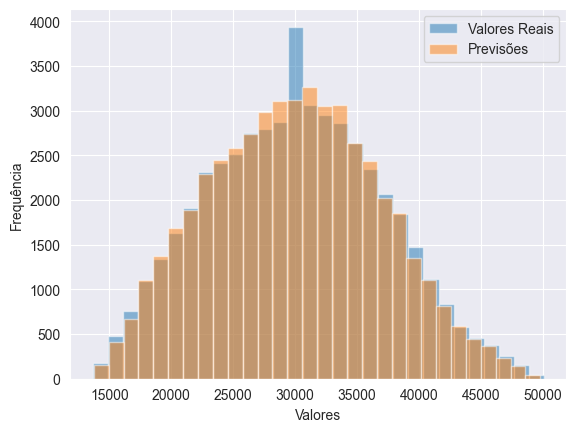

In [99]:
# Obtenha as previsões para o conjunto de dados inteiro
seguros_predictions = model_rfr.predict(seguros_preparado)

# Crie um histograma dos valores reais
plt.hist(y, bins=30, alpha=0.5, label='Valores Reais')

# Crie um histograma dos valores previstos
plt.hist(seguros_predictions, bins=30, alpha=0.5, label='Previsões')

plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.legend(loc='upper right')

plt.show()

plt.show()
# Validação Cruzada

A validação cruzada é uma técnica utilizada para avaliar a capacidade de generalização de um modelo, permitindo que ele seja treinado e testado em diferentes subconjuntos dos dados. Aqui, usamos a validação cruzada com o K-Fold para avaliar o modelo de árvore de decisão.

## Com PCA

In [100]:
kfold = KFold(n_splits=10, shuffle=True)  # shuffle=True, Shuffle (embaralhar) os dados
result = cross_val_score(dt_regressor, X, y, cv=kfold)

print('K-Fold (r^2) Scores: {0}'.format(result))
print('Mean R^2 for Cross-Validation K-Fold: {0}'.format(result.mean()))

K-Fold (r^2) Scores: [0.94277487 0.95210158 0.95019313 0.95290569 0.94516661 0.94628573
 0.94228597 0.94717795 0.94018451 0.94851725]
Mean R^2 for Cross-Validation K-Fold: 0.9467593310568571


- kfold = KFold(n_splits=5, shuffle=True): Cria um objeto KFold que será usado para dividir o conjunto de dados. n_splits=5 indica que o conjunto de dados será dividido em 5 partes (ou folds). shuffle=True significa que os dados serão embaralhados antes de serem divididos, o que ajuda a evitar viés relacionado à ordem dos dados.
- result = cross_val_score(model_dtr, X, y, cv=kfold): Utiliza a função cross_val_score para avaliar o modelo model_dtr (um regressor de árvore de decisão, neste caso). X e y são, respectivamente, os conjuntos de características e rótulos do conjunto de dados. cv=kfold indica que a estratégia de divisão do conjunto de dados para a validação cruzada será a definida pelo objeto kfold criado anteriormente.

## Sem PCA

Agora vamos realizar a validação cruzada sem a utilização do PCA

In [101]:
kfold = KFold(n_splits=5, shuffle=True)  # shuffle=True, Shuffle (embaralhar) os dados
result = cross_val_score(model_rfr, X, y, cv=kfold)

print('K-Fold (r^2) Scores: {0}'.format(result))
print('Mean R^2 for Cross-Validation K-Fold: {0}'.format(result.mean()))

K-Fold (r^2) Scores: [0.95291558 0.95523698 0.95646062 0.94932045 0.95382513]
Mean R^2 for Cross-Validation K-Fold: 0.953551750915252


# TESTANDO COM NOVOS DADOS

In [102]:
n = 10  # Número de registros que você deseja gerar
idade_values = np.linspace(18, 65, n)  # Gera n valores de idade entre 18 e 65
imc_values = np.linspace(20, 30, n)  # Gera n valores de IMC entre 20 e 30
fumante_values = ['sim', 'não'] * (n // 2)  # Possíveis valores para fumante
genero_values = ['masculino', 'feminino'] * (n // 2)  # Possíveis valores para fumante

registros = []

for idade, imc, fumante, genero in zip(idade_values, imc_values, fumante_values, genero_values):
    registro = {
        'Idade': int(idade),
        'Gênero': genero,
        'IMC': imc,
        'Filhos': 2,
        'Fumante': fumante,
        'Região': 'sudeste'
    }
    registros.append(registro)

# Convertendo a lista de registros em um DataFrame
novo_registro = pd.DataFrame(registros)

# Passando o novo registro através da pipeline de pré-processamento
novo_registro_preparado = full_pipeline.transform(novo_registro)

# Usando o modelo treinado para fazer uma previsão
nova_previsao = model_rfr.predict(novo_registro_preparado)

# Adicionando os encargos previstos ao DataFrame
novo_registro['Encargos_Previstos'] = nova_previsao

# Imprimindo o DataFrame com os encargos previstos
print(novo_registro)

# Imprimindo a previsão
print("\nPrevisão para os novos registros:", nova_previsao)

print("\nFim do notebook.")

   Idade     Gênero        IMC  Filhos Fumante   Região  Encargos_Previstos
0     18  masculino  20.000000       2     sim  sudeste        24732.889782
1     23   feminino  21.111111       2     não  sudeste        16440.043600
2     28  masculino  22.222222       2     sim  sudeste        28886.791691
3     33   feminino  23.333333       2     não  sudeste        21270.047200
4     38  masculino  24.444444       2     sim  sudeste        33738.073600
5     44   feminino  25.555556       2     não  sudeste        26369.198800
6     49  masculino  26.666667       2     sim  sudeste        38798.362400
7     54   feminino  27.777778       2     não  sudeste        31243.133600
8     59  masculino  28.888889       2     sim  sudeste        43617.914800
9     65   feminino  30.000000       2     não  sudeste        35814.774891

Previsão para os novos registros: [24732.88978245 16440.0436     28886.79169123 21270.0472
 33738.0736     26369.1988     38798.3624     31243.1336
 43617.9148    